In [9]:
import numpy as np
import matplotlib.pyplot as plt

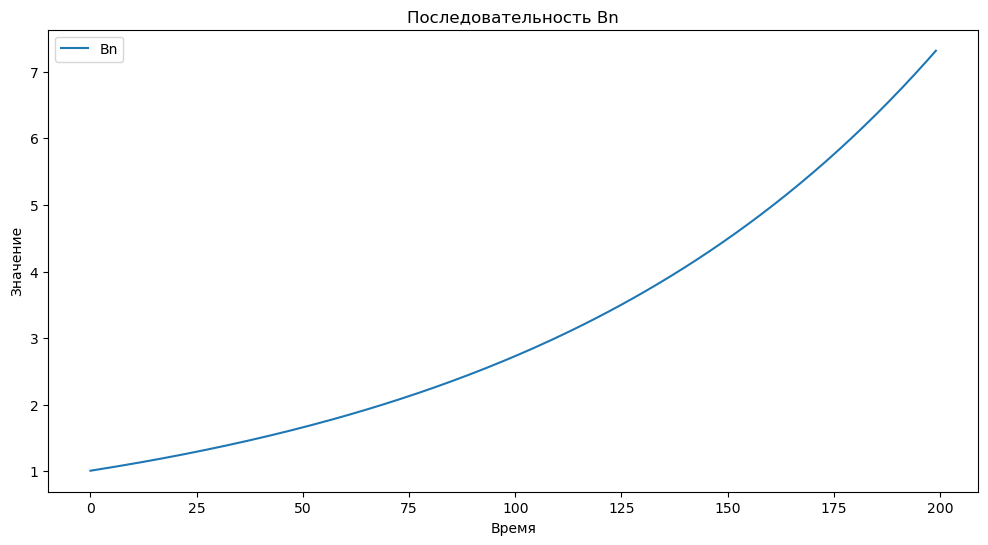

In [17]:
# Реализовать последовательность {Bn} для заданного значения ставки r =
# 001, используя формулу (5), за период N = 200 при B0 = 1. Построить
# график

B = np.zeros(201)
B[0] = 1
r = 0.01

for i in range(1,200+1):
    B[i] = (1 + r)*B[i-1]
B = B[1:]

plt.figure(figsize=(12, 6))
plt.plot(B, label="Bn")
plt.title("Последовательность Bn")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.show()

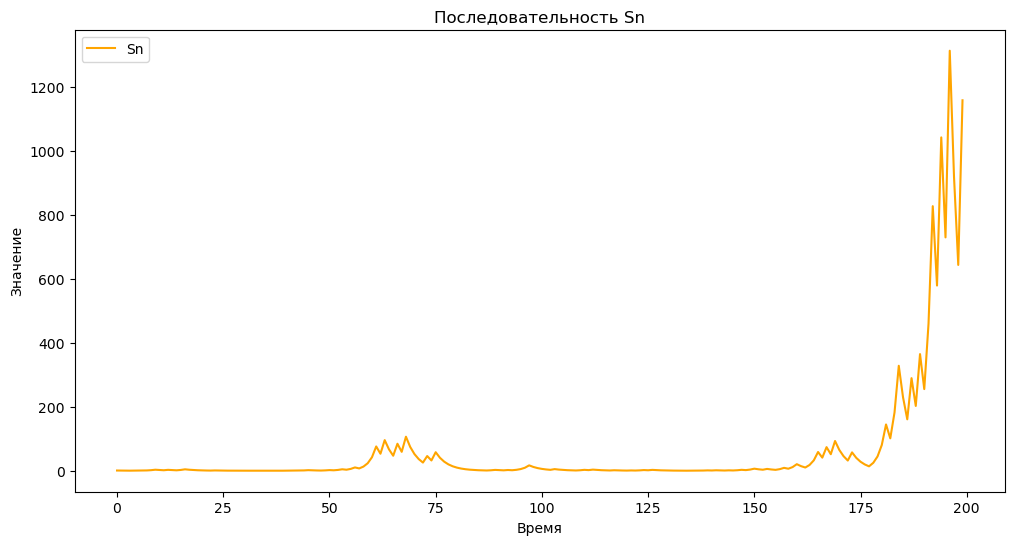

[3 5 4 4 1 4 1 4 4 2 3 4 5 4 5 5 2 5 5 5 0 3 2 5 3 5 3 5 4 5 3 2 3 4 3 4 2
 5 4 2 5 5 3 4 4 5 5 5 5 1 5 4 4 4 8 6 4 3 4 5 4 0 1 5 5 3 2 5 1 2 3 3 4 3
 3 3 4 4 4 4 5 3 3 3 3 4 4 2 3 5 5 3 7 6 5 4 4 4 6 2]


In [57]:
# Реализовать случайный процесс {Sn}, используя формулу (5), при следующих 
# значениях параметров: S0 = 1, N = 200, a = −0.3, b = 0.8, p = 0.4.
# Построить график

S = np.zeros(201)
S[0] = 1

a = -0.3
b = 0.8
p = 0.4

for i in range(1,200+1):
    Pn = b if np.random.binomial(1,p) else a
    S[i] = (1 + Pn)*S[i-1]
S = S[1:]

plt.figure(figsize=(12, 6))
plt.plot(S, label="Sn", color="orange")
plt.title("Последовательность Sn")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.show()

In [112]:
# 3. Рассчитать справедливую цену call-опциона по формуле (7) при следую
# щих значениях параметров: S0 = 100, N = 10, a = −0.3, b = 0.8, r = 0.2,
# K = 100.
from scipy.stats import binom
import math

S0 = 100

N = 10

r = 0.2
a = -0.3
b = 0.8
K = 100

p_tilt = (r-a)/(b-a)
p_aster = (1+b)*p_tilt/(1+r)
K0 = 1 + (np.log(K/(S0*(1+a)**N))/np.log((1+b)/(1+a)))

print("Ko =",K0)
print("Ko <= N")
# использовал кумулятивную функцию распределения
# binom.cdf(round(K0-1), N, p_aster) это вероятность что успешных событий будет <= K0-1 таким образов вычитая эту вероятноть из 1 
# получаем вероятность успехов в количестве от K0 до N
C_N = S0*(1 - binom.cdf(round(K0-1), N, p_aster)) - (1 - binom.cdf(round(K0-1), N, p_tilt))*K/(1+r)**(N) if K0 <= N else 0
print("C_N справедливая (рациональная) стоимость ", C_N)

Ko = 4.776489595765398
Ko <= N
C_N справедливая (рациональная) стоимость  85.5964885312535
